In [14]:
# Program to parse, and display info from Picuris Bison migration data set
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [15]:
# Read in original data set
original_df = pd.read_excel('./bison_presence_dataset.xlsx')
# print(original_df.columns) 

# Create new data set keeping only the specified columns
df_with_columns = original_df[['longitude','latitude', 'year', 'Country', 'OID', 'States.Provinces', 'Reference_number']]
# print(df)

states = [
    "New mexico",
    "Utah",
    "Colorado",
    "Arizona",
    "Kansas",
    "Texas",
    "Oklahoma",
]
# Trim rows that are not from the states we want
df_filtered = df_with_columns[(df_with_columns['States.Provinces']).isin(states)]
# print(len(df_filtered))


<Axes: >

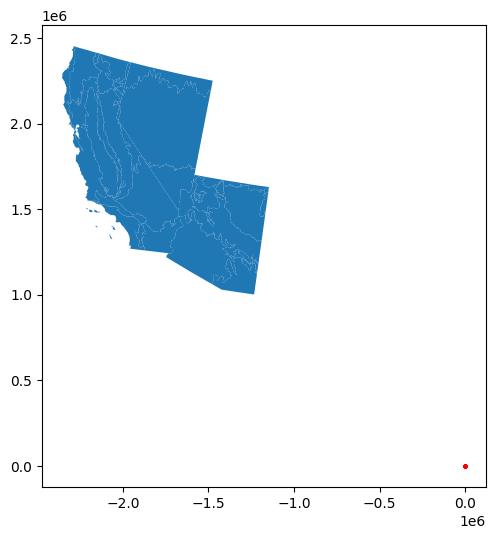

In [16]:
corner_1 = (31.0, -114.2)
corner_2 = (31.0, -99.9)
corner_3 = (36.5, -114.2)
corner_4 = (36.5, -99.9)


geometry = [Point(xy) for xy in zip(df_filtered['longitude'], df_filtered['latitude'])]
gdf = GeoDataFrame(df_filtered, geometry=geometry)   

#this is a simple map that goes with geopandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
zipfile = "reg9_eco_l3.zip"
states = gpd.read_file(zipfile)
gdf.plot(ax=states.plot(figsize=(10, 6)), marker='o', color='red', markersize=2)